In [1]:
# 데이터 불러오기
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0 # 데이터 차원 변경: 3차원->4차원으로
  # 1장의 사진 가로세로 28*28이었는데 >> 사진 두께감있게 변경한 셈 -> 1: 너비에 1차원 부여한 것
    # 케라스: 4차원 데이터 입력될 것을 원함 -> 컬러 이미지일 경우 3차원 데이터가 6만장 있는 것 입력받길 원하기에, 이리 형변환
  # 정규화도 함께 함

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target)

# 합성곱: Conv2D
  # conv2D >> pooling 한세트
# 모델 선언
model = keras.Sequential() # 비어 있는 모델 만들기 >> 여기에 신경망 하나씩 배치할 것
model.add(keras.layers.Conv2D(32,
          kernel_size=3,
          activation='relu',
          padding='same',
          input_shape=(28, 28, 1)))

model.add(keras.layers.MaxPooling2D(2)) #??
model.add(keras.layers.Conv2D(
    64,
    kernel_size=3,
    activation='relu',
    padding='same'))
# 합성곱 한번 더 하면 사람이 알아보기 어려워지는데, 사람이 찾지 못하는 특성 더 찾기에 한번 더 한 것
model.add(keras.layers.MaxPool2D(2))

model.add(keras.layers.Flatten())# 평탄화
model.add(keras.layers.Dense(100, activation='relu')) # 밀집층 만들기
model.add(keras.layers.Dropout(0.4)) # 40%씩 픽셀 온오프
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary() # 만든 모델 구조 확인하기

# 합성곱: 이미지 잘 처리하기 위해 이미지 인식하는 과정
  # 이를 토대로 신경망 모델 만들어 학습시켜야 하는 것

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         313,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# 컴파일
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
es = keras.callbacks.EarlyStopping(patience=2) # 2개 이상 에포크 성능 떨어질 시 조기종료

# 학습
result = model.fit(
    train_scaled, train_target,
    epochs=20,
    validation_data=(val_scaled, val_target),
    callbacks=[es])

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9226 - loss: 0.2074 - val_accuracy: 0.9159 - val_loss: 0.2277
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9264 - loss: 0.1973 - val_accuracy: 0.9210 - val_loss: 0.2378
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9329 - loss: 0.1794 - val_accuracy: 0.9189 - val_loss: 0.2295


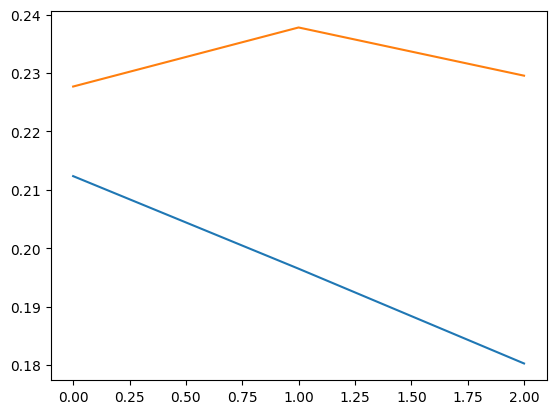

In [4]:
import matplotlib.pyplot as plt
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])

In [6]:
# test 셋으로 검증하기

model.evaluate(val_scaled, val_target) # > accuracy: 0.9170 - loss: 0.2370

test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0 # 한번도 학습 안 시켜봤던 test로 채점
model.evaluate(test_scaled, test_target) # accuracy: 0.9133 - loss: 0.2587

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9170 - loss: 0.2370
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9133 - loss: 0.2587


[0.252560019493103, 0.9136000275611877]